# Boot

In [1]:
# from google.colab import drive
# drive.mount("/gdrive", force_remount=True)

In [2]:
# !cp -r '/gdrive/My Drive/Mestrado/07 - Autonomous/code/' '/content'
# !mv '/content/code' '/content/scripts'
# !cp '/content/scripts/cluster.py' '/content'
# !cp '/content/scripts/get_radius.py' '/content'
# !cp '/content/scripts/new_cluster.py' '/content'
# !cp '/content/scripts/update_clusters.py' '/content'
# !cp '/content/scripts/utils.py' '/content'
# !rm -r '/content/scripts/'

In [3]:
# !cp -r '/gdrive/My Drive/Mestrado/07 - Autonomous/data/' '/content'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algorithm

In [5]:
from utils import min_dist, is_empty_list, dist
from new_cluster import new_cluster
from update_clusters import update_winner_cluster, update_nearest_cluster
from overlap import overlap
from merge import merge

In [6]:
class Autonomous:
    def __init__(self, fac, frac=100, m=4): # default of article
        self.fac = fac
        self.frac = frac
        self.m = m
        self.clusters = []
        self.cont = 0

    pass

    # x = np.array
    def process(self, x):
        p = len(x)
        if is_empty_list(self.clusters):
            self.clusters.append(new_cluster(
                x, self.frac, self.fac, p, self.m))
        else:
            win_cluster = min_dist(x, self.clusters)
            if dist(x, win_cluster) > win_cluster.radius:
                self.clusters.append(new_cluster(
                    x, self.frac, self.fac, p, self.m))
            else:
                self.clusters.remove(win_cluster)
                update_winner_cluster(x, win_cluster)

                if len(self.clusters) != 0:
                    update_nearest_cluster(x, win_cluster, self.clusters)
                    
                (max_olap, max_cluster) = overlap(win_cluster, self.clusters)
                if (max_olap > 0):
                    self.cont += 1
#                     self.clusters.remove(win_cluster)
#                     self.clusters.remove(max_cluster)

#                     new_cluster = merge(win_cluster, max_cluster)
#                     self.clusters.append(new_cluster)
                else:
                    self.clusters.append(win_cluster)
        pass

# Test with S1

http://cs.joensuu.fi/sipu/datasets/

In [7]:
data_s1 = pd.read_csv('../data/s1.txt', delimiter='    ', header=None, engine='python')
print(data_s1.values)
print(type(data_s1.values))
print(len(data_s1.values))

[[664159 550946]
 [665845 557965]
 [597173 575538]
 ...
 [650661 861267]
 [599647 858702]
 [684091 842566]]
<class 'numpy.ndarray'>
5000


In [8]:
data = data_s1
normalized_df=(data-data.min())/(data.max()-data.min())

In [9]:
data_s1_cb = pd.read_csv('../data/s1-cb.txt', delimiter=' ', header=None, engine='python')
data_s1_cb = data_s1_cb.drop([2], axis=1)
print(len(data_s1_cb.values))

15


In [10]:
autonomous_S1 = Autonomous(fac = 3.3)

for r in data_s1.values:
    autonomous_S1.process(r)

In [14]:
autonomous_S1.cont

328

In [11]:
len(autonomous_S1.clusters)

4344

In [24]:
# random list of colors
import random
from sklearn.utils import shuffle

list_cor = []
for i in range(0,10000):
    r = lambda: random.randint(0,255)
    cor = '#%02X%02X%02X' % (r(),r(),r())
    list_cor.append(cor)

unique_list = np.array(list_cor)
unique_list = np.unique(unique_list)
print(len(unique_list))
print(len(list_cor))
list_cor = unique_list

list_cor = shuffle(list_cor)

9999
10000


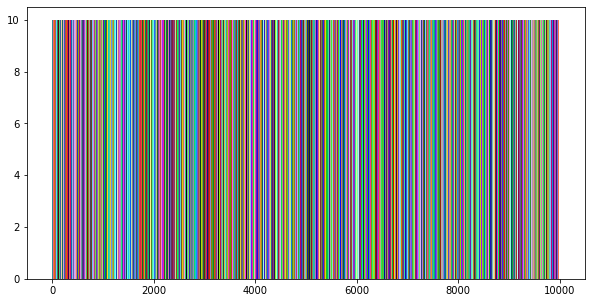

In [25]:
barWidth = 1

plt.figure(figsize=(10,5))
for i in range(0,len(list_cor)):
    plt.bar(i, 10, color = list_cor[i], width=barWidth, label=str(list_cor[i]))
plt.show()

IndexError: index 9999 is out of bounds for axis 0 with size 9999

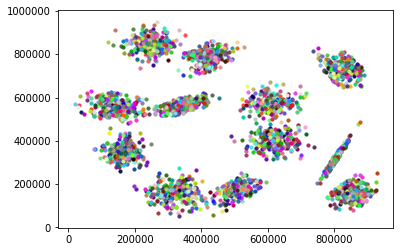

In [26]:
plt.figure()
i_cor = 0
for cluster in autonomous_S1.clusters:
#     print(len(cluster.S))
    for s in cluster.S:
        plt.scatter(s[0], s[1],s=10, c=list_cor[i_cor*3])
    i_cor += 1
plt.show()